## Data Exploration - Kaggle Liberty

In [30]:
%matplotlib inline

from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from numpy.random import normal
import seaborn


#My functions
import data_prep as dp
import run_random_forest as rrf


In [59]:
data = dp.read_data('train.csv')
train, test = dp.split_train_test(data)
y_train, X_train = dp.get_target_variable(train, 'Hazard')
y_test, X_test = dp.get_target_variable(test, 'Hazard')

X_ID = train.pop('Id')
Y_ID = test.pop('Id')

# Are there any missing values?
dp.print_columns_with_missing(X_train)
dp.print_columns_with_missing(X_test)

train.head(5)

,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
46113,9,21,4,N,C,Y,A,B,D,8,...,4,22,1,1,6,Y,N,C,4,5
45894,8,3,2,B,H,Y,B,B,D,7,...,2,37,1,14,7,Y,N,E,2,3
42963,6,19,2,N,K,N,B,B,E,12,...,2,31,1,21,4,N,N,A,4,2
43939,8,9,1,N,C,Y,B,B,D,8,...,2,40,1,4,7,N,N,A,2,7
35768,3,7,3,W,A,Y,B,B,D,3,...,2,25,1,3,7,Y,N,E,5,3


### Histogram of Each Variable

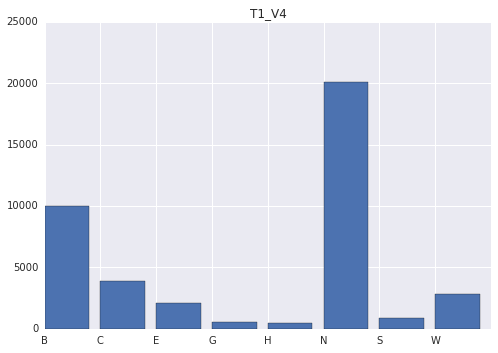

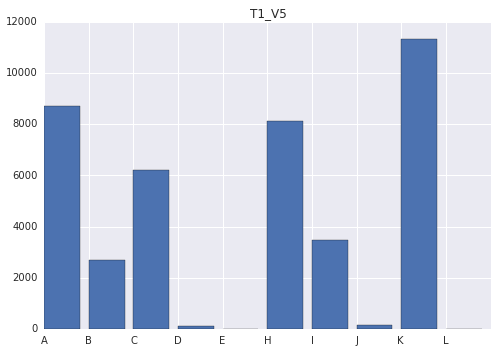

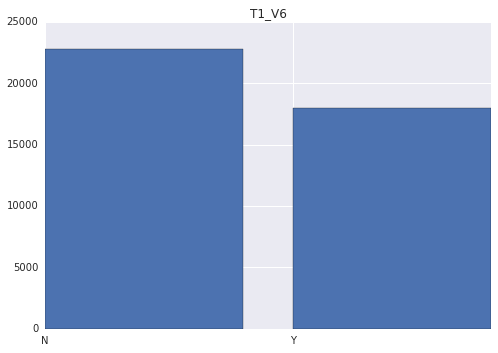

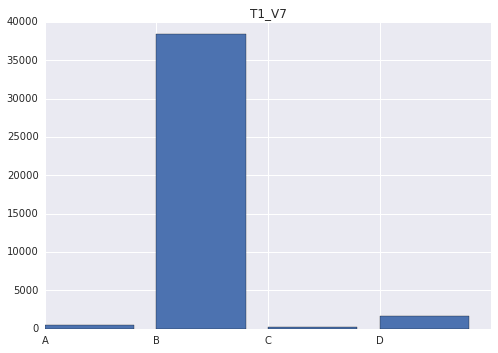

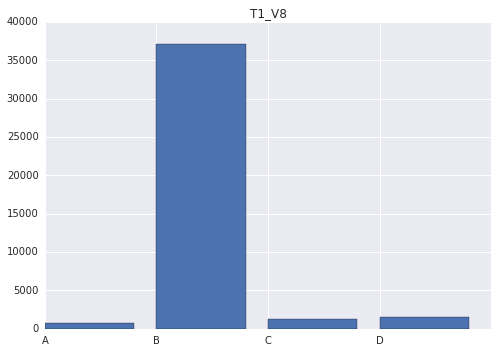

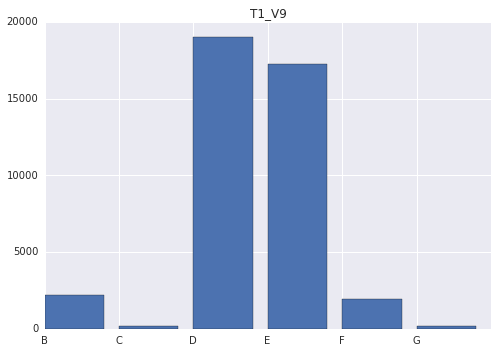

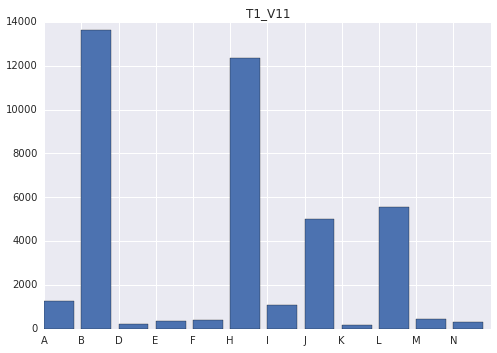

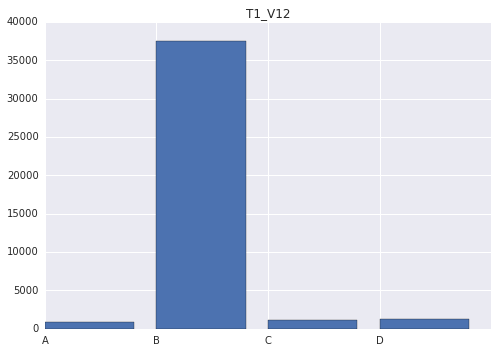

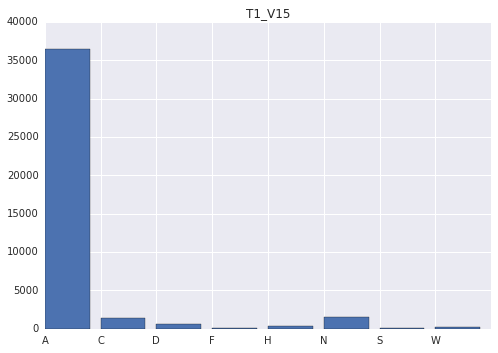

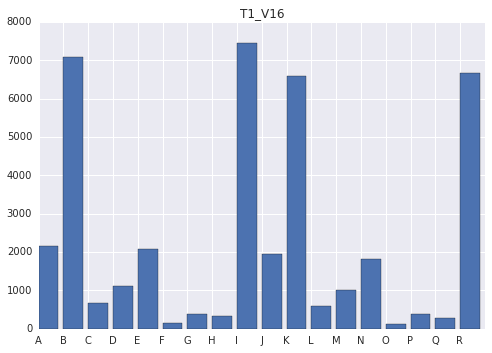

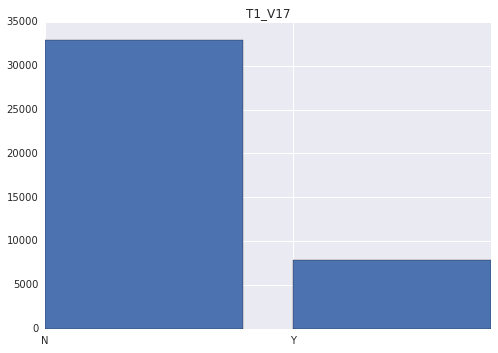

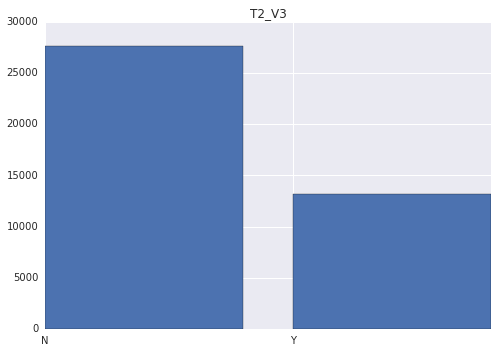

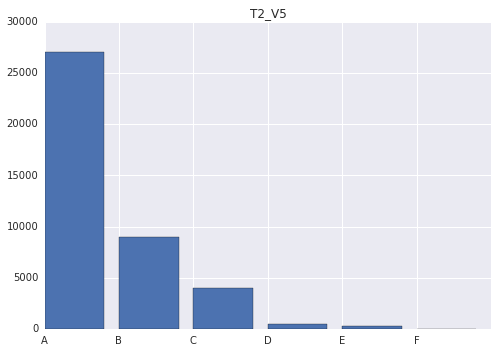

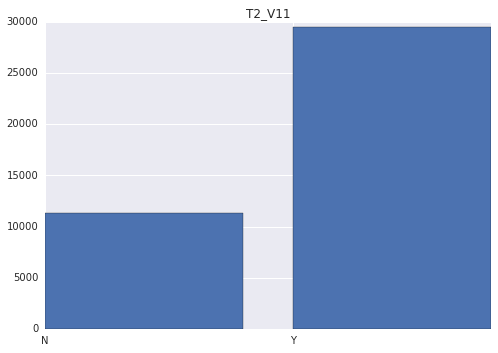

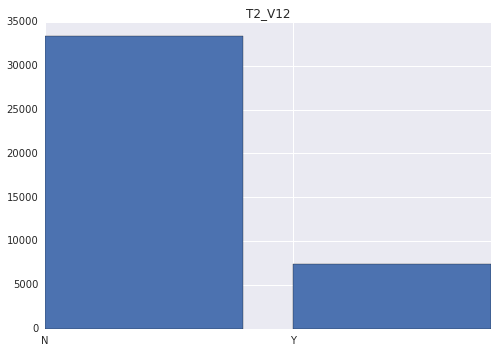

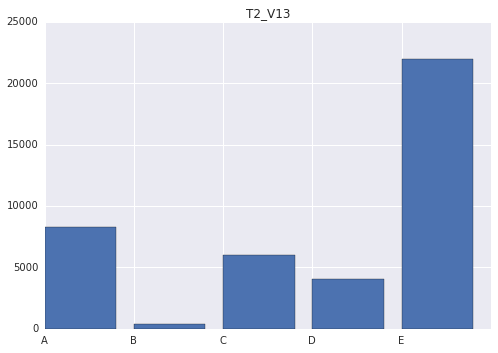

In [58]:
for i in train.columns:
    if i == 'Id':
        continue
    try:
        int(train[i].ix[0])
        plt.hist(train[i])
        plt.title("{}".format(i))
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.show()
    except:
        g = train.groupby(i)
        data = pd.DataFrame(g.count()['T1_V1'])
        labels = list(data['T1_V1'].index)
        x_axis = list(range(0, len(labels)))
        count = list(data['T1_V1'])
        plt.bar(x_axis, count)
        plt.xticks(x_axis, labels)
        plt.title("{}".format(i))
        plt.show()
    